In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
# Load tha data for the pose
poseName = 'Develope'
loaded = np.load("RootCoordinates/"+poseName+'X.npy')
print("Loaded: ",loaded)
print("Length:", len(loaded))

Loaded:  [[0.512317 0.282106 0.899708 ... 0.524612 0.742433 0.430888]
 [0.510297 0.287524 0.908392 ... 0.522502 0.748045 0.659226]
 [0.514202 0.2848   0.922879 ... 0.524468 0.745214 0.509468]
 ...
 [0.508067 0.303831 0.849263 ... 0.524451 0.734293 0.39533 ]
 [0.506182 0.306568 0.8451   ... 0.524554 0.739802 0.435512]
 [0.504103 0.320136 0.856297 ... 0.522479 0.756102 0.613614]]
Length: 870


870


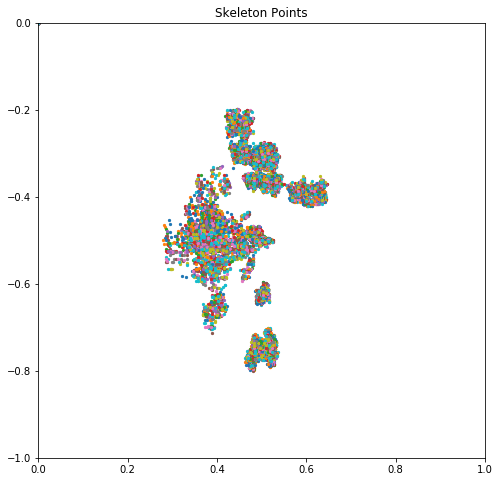

In [3]:
count = 0
def plotCoordinates():
    fig, ax = plt.subplots(1, figsize=(8,8))
    plt.title('Skeleton Points')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global count
    for list in loaded:
        x = list[0::3]
        posY = list[1::3]
        y = [-y for y in posY] #need to make the loaded y values negative for plotting correctly.
        c = list[2::3]
        sc = ax.scatter(x,y,s=5)
        count+=1
plotCoordinates()
print(count)

870


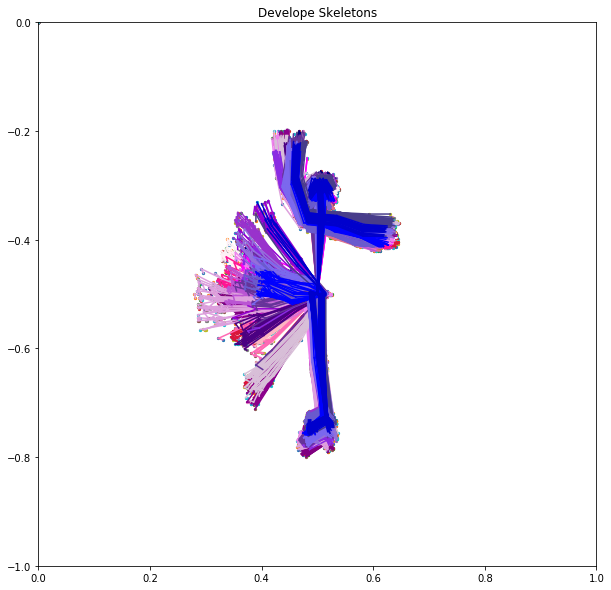

In [4]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']

allXList =[]
allYList = []
allCList=[]

dancerNum = 0
count = 0
def plotSkeletons():
    fig,ax = plt.subplots(1,figsize = (10,10))
    plt.title(poseName +' Skeletons')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global dancerNum
    global count
    for list in loaded:
        x = list[0::3]
        allXList.append(x)# all x values per sample
        posY = list[1::3]
        y = [-y for y in posY]# all y values per sample
        allYList.append(y) # the negative values get saved as the mean skeleton.
        c = list[2::3]
        allCList.append(c)# all c values per sample
        sc = ax.scatter(x,y,s=5)
        for bone in bones:
            if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                continue
                
            ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]],penColor[dancerNum-1])
        count+=1
        if count%30 == 0:
            dancerNum+=1
            #print(dancerNum)
plotSkeletons()
print(count)

In [5]:
#Save the split up lists in XYCSplitListsDirectory
np.save('XYCSplitLists/all'+poseName+'XList.npy', allXList)
np.save('XYCSplitLists/all'+poseName+'YList.npy', allYList)
np.save('XYCSplitLists/all'+poseName+'CList.npy', allCList)

xloaded = np.load('XYCSplitLists/all'+poseName+'XList.npy')
print(xloaded)
yloaded = np.load('XYCSplitLists/all'+poseName+'YList.npy')
print(yloaded)
cloaded = np.load('XYCSplitLists/all'+poseName+'CList.npy')
print(xloaded)

[[0.512317 0.502177 0.475603 ... 0.483824 0.487807 0.524612]
 [0.510297 0.500146 0.473499 ... 0.481697 0.483666 0.522502]
 [0.514202 0.502097 0.477473 ... 0.483645 0.48565  0.524468]
 ...
 [0.508067 0.51214  0.485623 ... 0.487635 0.487682 0.524451]
 [0.506182 0.510259 0.483758 ... 0.483767 0.483828 0.524554]
 [0.504103 0.508117 0.48368  ... 0.485654 0.485652 0.522479]]
[[-0.282106 -0.347569 -0.344653 ... -0.748048 -0.742593 -0.742433]
 [-0.287524 -0.352998 -0.35009  ... -0.761539 -0.750763 -0.748045]
 [-0.2848   -0.352751 -0.347431 ... -0.756112 -0.747906 -0.745214]
 ...
 [-0.303831 -0.355662 -0.352967 ... -0.739739 -0.731588 -0.734293]
 [-0.306568 -0.358357 -0.35567  ... -0.742526 -0.73702  -0.739802]
 [-0.320136 -0.371933 -0.3692   ... -0.758805 -0.753341 -0.756102]]
[[0.512317 0.502177 0.475603 ... 0.483824 0.487807 0.524612]
 [0.510297 0.500146 0.473499 ... 0.481697 0.483666 0.522502]
 [0.514202 0.502097 0.477473 ... 0.483645 0.48565  0.524468]
 ...
 [0.508067 0.51214  0.485623 ...

In [6]:
# Now calculate mean skeleton:
sumXList = [sum(i) for i in zip(*allXList)]# the * indicates the use of iterables
sumYList = [sum(j) for j in zip(*allYList)]
sumCList =[sum(k) for k in zip(*allCList)]
print(sumXList)
print(sumYList)
print(sumCList)

#Get the average: sum/count - count calculated in cell 2 of this notebook = number of samples.
avgXList = [sx / count for sx in sumXList]
avgYList = [sy / count for sy in sumYList]
avgCList =[sc / count for sc in sumCList]
print(avgXList)
print(avgYList)
print(avgCList)

[438.66586899999993, 437.423916, 414.57558999999975, 393.2364360000007, 392.8064540000002, 460.76762999999943, 504.49595299999964, 540.6911280000007, 435.0, 423.88208399999996, 436.28998900000033, 446.6560540000006, 445.14519699999977, 407.72234899999967, 359.59395299999983, 432.6529169999999, 445.11533399999956, 412.65028499999977, 439.13503699999967, 327.6274370000002, 312.4068430000002, 352.0637640000004, 417.8780279999996, 420.27100500000023, 452.5034740000004]
[-267.51173500000016, -319.21384499999994, -315.9749389999996, -259.0082220000003, -202.66321400000035, -322.9887159999998, -337.96822200000025, -341.747203, -435.0, -434.9303529999998, -542.5832009999999, -642.1478279999999, -435.3952360000003, -453.8918650000005, -468.96490400000005, -261.13443299999983, -261.068225, -266.1521760000001, -266.06599199999977, -462.1742919999992, -445.26132800000005, -467.4677150000005, -659.6286970000007, -655.0396, -653.4239419999999]
[784.0541059999995, 778.2554049999998, 751.031492, 759.2

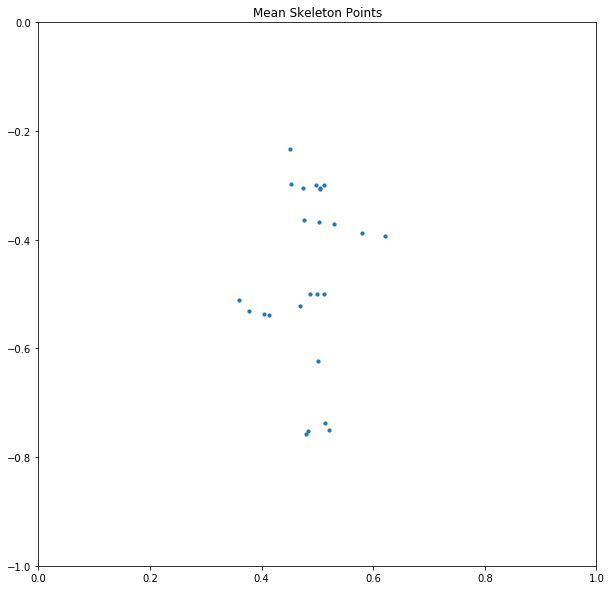

In [7]:
#Plot mean skeleton:
def plotMeanCoordinates():
    fig, ax = plt.subplots(1, figsize=(10,10))
    plt.title('Mean Skeleton Points')
    plt.xlim(0, 1)
    plt.ylim(-1, 0)
    sc = ax.scatter(avgXList,avgYList, s=10)
    #for bone in bones:
        #if avgXList[bone[0]]== 0.0 or avgYList[bone[0]] == 0.0  or avgXList[bone[1]] == 0.0 or avgYList[bone[1]] == 0.0:
            #print("zero values for joint: ",avgXList.index(avgXList[bone[0]]))
            #print("zero values for joint: ",avgXList.index(avgXList[bone[1]]))
        #ax.plot([avgXList[bone[0]],avgXList[bone[1]]],[avgYList[bone[0]],avgYList[bone[1]]])
plotMeanCoordinates()

In [8]:
#calculation of standard deviation values:
import statistics

In [9]:
standardDeviationX = [statistics.stdev(i) for i in zip(*allXList)]
standardDeviationY = [statistics.stdev(i) for i in zip(*allYList)]
standardDeviationC = [statistics.stdev(i) for i in zip(*allCList)]

print("Standard Deviations of X values:",standardDeviationX)
print("Standard Deviations of Y values:",standardDeviationY)
print("Standard Deviations of C values:",standardDeviationC)

Standard Deviations of X values: [0.007712716294958645, 0.00532074811392511, 0.00710585584713703, 0.009162888604009834, 0.012875828222815574, 0.005077627413310944, 0.0076627163688429735, 0.012937748952318716, 0.0, 0.0043026378622122415, 0.00829893447573369, 0.01186768252889758, 0.004511553776992334, 0.024493805299530453, 0.06416928816290811, 0.007276447286468954, 0.007078613662358564, 0.07846822417659782, 0.09058799344341707, 0.0790530504637088, 0.11937126861570034, 0.0685160998384836, 0.01203409849330368, 0.011869602880713051, 0.021288613333743524]
Standard Deviations of Y values: [0.012934885923801497, 0.008805534475535556, 0.008151236763785798, 0.011144630091821994, 0.014150348002760948, 0.01045066883695467, 0.010831644055095253, 0.013190108259110038, 0.0, 0.0027940322743944456, 0.01529559788555168, 0.02898735549687009, 0.002734062439502244, 0.05007172117540962, 0.11201881327082873, 0.012250310549086239, 0.012360389840915642, 0.051807830634871176, 0.055986162082305044, 0.14176015615

In [10]:
#plot standard deviation coordinates?
print(len(standardDeviationX))
print(len(avgXList))

25
25


In [11]:
np.save('Stats/'+poseName+'StdDevX.npy', standardDeviationX)
np.save('Stats/'+poseName+'StdDevY.npy', standardDeviationY)
np.save('Stats/'+poseName+'StdDevC.npy', standardDeviationY)
np.save('Stats/'+poseName+'MeanX.npy', avgXList)
np.save('Stats/'+poseName+'MeanY.npy', avgYList)
np.save('Stats/'+poseName+'MeanC.npy', avgCList)